### Geometric Random Walk

Let $x_1, ..$ be iid r.v with $x_i \sim \mathcal{N}(\mu, \sigma^2)$ where $\mu \in \mathbb{R}$, $\sigma^2>0$.

$(Y_n:n>0)$ is a discrete time random walk on $\mathbb{R}$ with $Y_{n+1} = Y_{n} + X_{n+1}$, $Y_0 =0$.

$(Z_n: n\geq 0)$ is a discrete time process on $[0, \infty)$ with $Z_n = \exp(Y_n)$ is called the **geometric random walk**

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Simulate $Z_n$ for one realisation

In [2]:
# parameters
μ = -0.01
σ = 0.2
tmax = 1000

In [3]:
x = np.random.randn(tmax)*σ+μ
x[0] = 0 
Y = np.cumsum(x)
Z = np.exp(Y)

(array([-17.5, -15. , -12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5]),
 <a list of 9 Text yticklabel objects>)

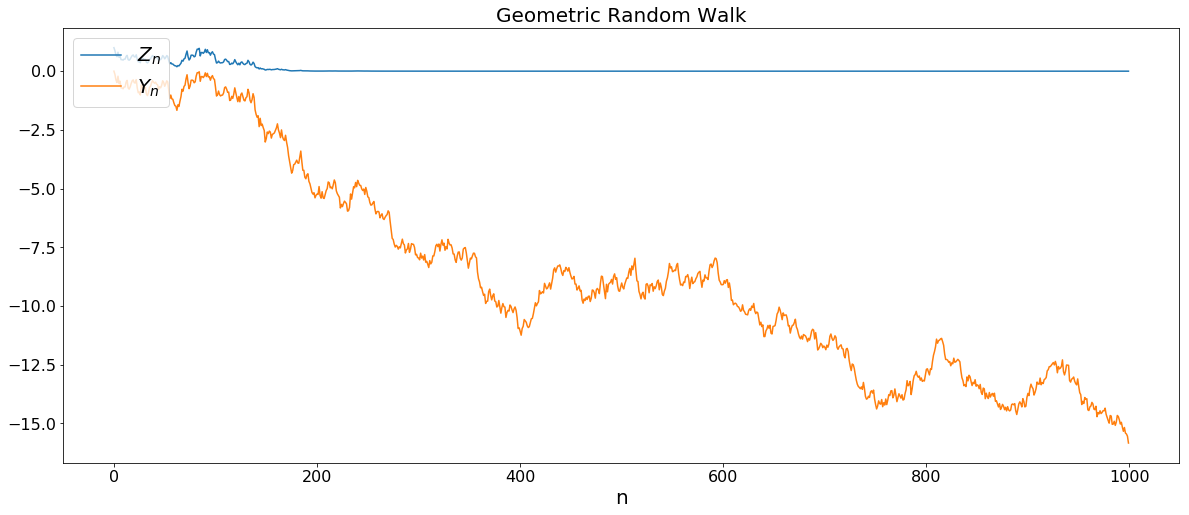

In [4]:
plt.figure(figsize = (20,8))
plt.plot(range(tmax), Z, label = r'$Z_n$')
plt.plot(range(tmax), Y, label = r'$Y_n$')
plt.title('Geometric Random Walk', fontsize =20)
plt.xlabel('n', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

**How would you simulate this for 500 realisations?**
Now compute multiple realisations (problem sheet, M=500).

Calculate the empirical average with error bars (similar to support class 1)

For boxplots use [https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) 

`plt.boxplot` 

In [5]:
# plt.boxplot(Z);
# sns.boxplot(Z)
# sns.kdeplot(Z, shade = True)

No handles with labels found to put in legend.


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

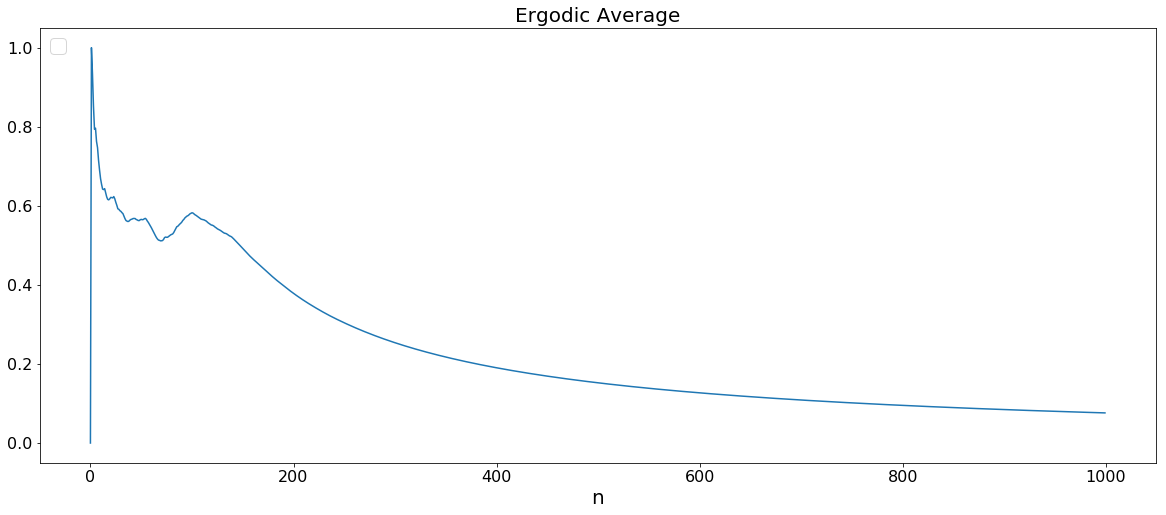

In [6]:
# ergodic average
ergodic_average = [x/y for x,y in zip(np.cumsum(Z), range(1,tmax))]
# [np.cumsum(Z)[i]/i for i in range(1,len(np.cumsum(Z)))]
ergodic_average.insert(0,0) #otherwise we run into the issue 0/0
plt.figure(figsize = (20,8) )
plt.plot(range(tmax), ergodic_average)
plt.title('Ergodic Average', fontsize =20)
plt.xlabel('n', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Empirical Tail

In [16]:
def one_cdf(data):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    return bin_edges[0:-1], np.ones(len(cdf))-cdf
 # Plot the cdf

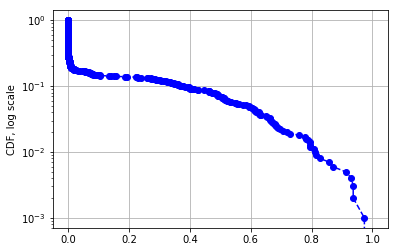

In [24]:
bins, zz = one_cdf(Z)
plt.plot(bins, zz,linestyle='--', marker="o", color='b')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel("CDF, log scale")
plt.grid(True)


### Wright-Fisher Model of population genetics

Fixed population of $L$ individuals.
Initially, $X_0(i) = i$ for $i \in [1,...,L]$

At each generation $t+1$, each individual $i$ picks uniformally a parent $U[\{1,...,L\}]$ and adopts its type:

$X_{t+1}(i) = X_t(j)$

I suggest using `plt.pcolor(X)` or `sns.heatmap` to plot the dynamics (or `plt.imshow` but this is less successful)

In [155]:
max_time = 400
L = 100

X = np.zeros(shape = (max_time, L)) #matrix, each row is new generation
X[0,:] = range(L) # initially individual i has type i (going from 0 - 99)

In [156]:
for t in range(1, max_time):
    old_states = X[t-1,:]
    new_states = [old_states[r] for r in np.random.randint(0,L, L)]
    X[t,:] = np.sort(new_states) #try it without np.sort
#     X[t,:] = new_states

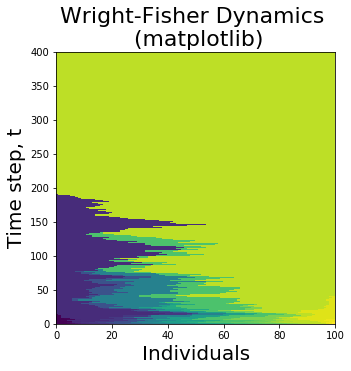

In [157]:
plt.figure(figsize = (5,5))
plt.ylabel('Time step, t', fontsize = 20)
plt.xlabel('Individuals', fontsize = 20)
plt.title('Wright-Fisher Dynamics \n (matplotlib)', fontsize = 22)
plt.pcolor(X)


Text(0.5,1,'Wright-Fisher Dynamics \n (seaborn)')

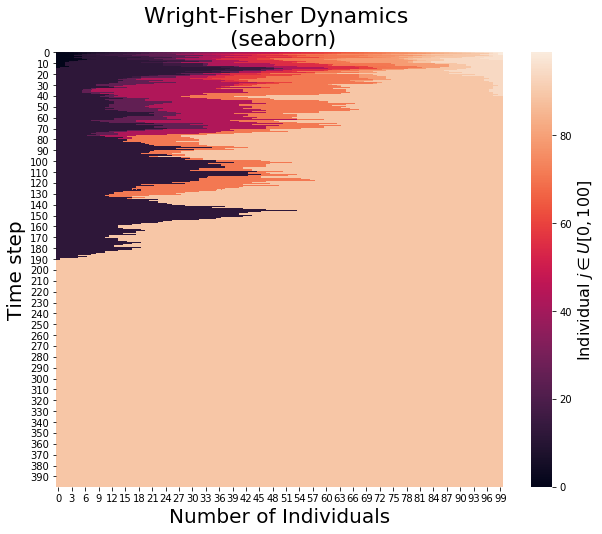

In [160]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(X,cbar_kws={'label': r'Individual $j \in U[0,100]$'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Number of Individuals', fontsize = 20)
plt.title('Wright-Fisher Dynamics \n (seaborn)', fontsize = 22)


In [69]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

In [80]:
array_L = np.arange(1,L)
max_time = 500
repeat = 50
M = np.zeros((len(array_L), repeat))
for i in range(1, len(array_L)):
    for j in range(0, repeat):
        X=np.zeros((max_time+1,array_L[i])) #Initialize
        X[0,:]=np.arange(array_L[i]) # at t=0 individual i has type i

        for t in range(1,max_time+1): # Time steps. list of integers from 1 to T.

            old_states=X[t-1,:]
            new_states = [old_states[r] for r in np.random.randint(0,array_L[i], array_L[i])]


            new_states=np.sort(new_states)

            X[t,:]=new_states

            if am_done(new_states):
                M[i,j]=t
                break


In [84]:
average = np.mean(M, axis = 1)
deviation = np.std(M, axis = 1)

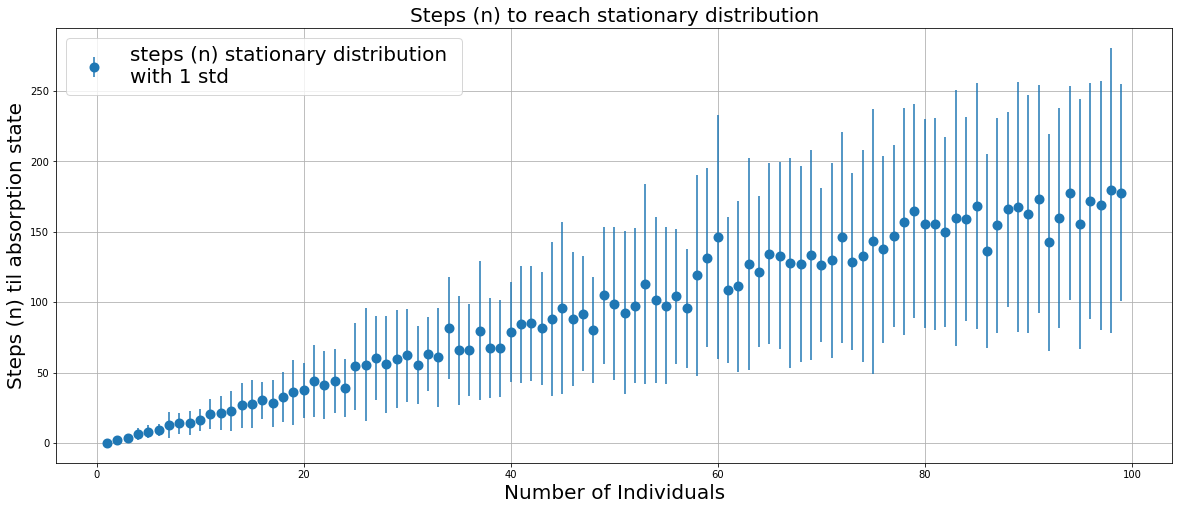

In [93]:
plt.figure(figsize = (20,8))
plt.ylabel(r'Steps (n) til absorption state', fontsize = 20)
plt.xlabel(r'Number of Individuals', fontsize = 20)
plt.title(r'Steps (n) to reach stationary distribution', fontsize = 20)

plt.errorbar(array_L, average, yerr = deviation, fmt = 'o', mew = 4, label = 'steps (n) stationary distribution \nwith 1 std')
plt.legend(loc='upper left', fontsize = 20)
plt.grid()